In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import plot_tools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [2]:
faces = fetch_olivetti_faces().data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)

In [3]:
# data = fetch_olivetti_faces()
# targets = faces.target
# data = faces.images.reshape((len(data.images), -1))

# #test_idx = [1,  10, 29, 34, 87,  94, 78, 320]
# test_idx = [1, 87, 94, 78]
# train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )

# train_set = data[train_idx ]
# y_train = targets[train_idx] 
# test_set = data[np.array(test_idx)]
# y_test = targets[ np.array(test_idx)]
# testImage = test_set[0, :]
# print(data.shape, train_set.shape,test_set.shape, testImage.shape)

In [4]:
cov = np.cov(faces_centered, rowvar=False)

In [5]:
#centered_cov = np.matmul(faces_centered.T, faces_centered)/399

In [6]:
#print(np.allclose(centered_cov, centered_cov))

In [7]:
eigvals, principal_directions = np.linalg.eigh(cov)

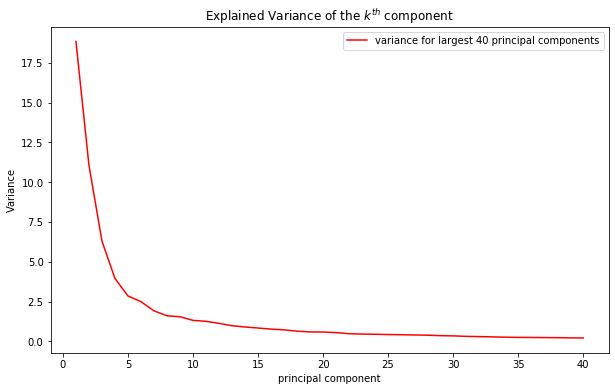

In [8]:
k = 40
truncated_eigvals = eigvals[::-1][:k]
fig, ax = plt.subplots(figsize=(10, 6))
k_range = range(1, k+1)
label_str = "variance for largest {} principal components".format(k)
ax.plot(k_range, truncated_eigvals, "-", color="red", label=label_str)
ax.set_xlabel("principal component")
ax.set_ylabel("Variance")
ax.set_title(r"Explained Variance of the $k^{th}$ component")
ax.legend()
plt.show();
fig.savefig("pb_4_b.pdf",bbox_inches='tight');

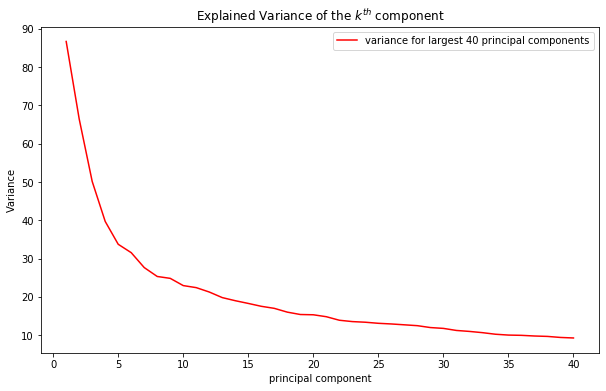

In [9]:
model = PCA(n_components=faces.shape[0], svd_solver="full")
model.fit(faces)
sigmas = model.singular_values_[:k]
k = 40
fig, ax = plt.subplots(figsize=(10, 6))
k_range = range(1, k+1)
ax.plot(k_range, sigmas, "-", color="red", label="variance for largest {} principal components".format(k))
ax.set_xlabel("principal component")
ax.set_ylabel("Variance")
ax.set_title(r"Explained Variance of the $k^{th}$ component")
ax.legend()
plt.show();

In [10]:
model = PCA(n_components=faces.shape[0])
model.fit_transform(faces)
#print(model.explained_variance_)
print(model.components_[0,:])

[-0.00419107 -0.00710951 -0.0093361  ...  0.0001852   0.0033797
  0.0031883 ]


In [11]:
principal_directions[:,4095]

array([-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
        0.00337966,  0.00318826])

In [12]:
model.components_[1,:]

array([-0.02859127, -0.03328845, -0.03784652, ...,  0.02962781,
        0.02721298,  0.02488896], dtype=float32)

In [13]:
principal_directions[:,4094]

array([-0.02859139, -0.03328836, -0.0378465 , ...,  0.02962783,
        0.02721299,  0.02488899])

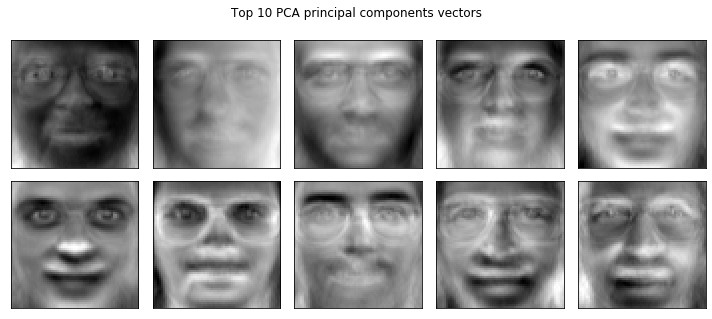

In [14]:
k =10
title = "Top {} PCA principal components vectors".format(k)
plot_tools.plot_image_grid(model.components_[:k,:], title)

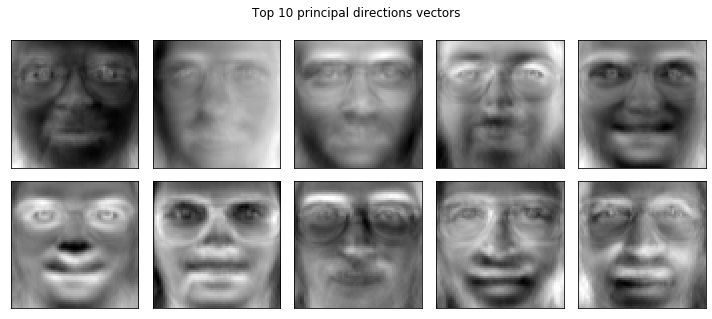

In [15]:
k = 10
idx = np.argsort(eigvals)[::-1][:k]
top_pc = principal_directions[:, idx].T
title = "Top {} principal directions vectors".format(k)
plot_tools.plot_image_grid(top_pc, title)

# Principal direction vectors

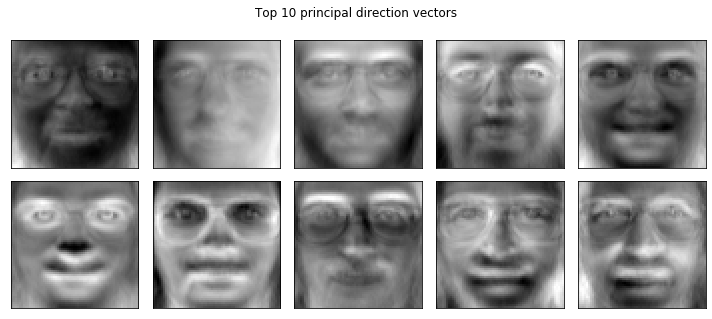

In [16]:
faces = fetch_olivetti_faces().data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
cov = np.cov(faces_centered, rowvar=False)
pd_eigvals, principal_directions = np.linalg.eigh(cov)
k = 10
idx = np.argsort(pd_eigvals)[::-1][:k]
pd_evecs = principal_directions[:,idx].T
title = "Top {} principal direction vectors".format(k)
plot_tools.plot_image_grid(pd_evecs, title)

In [17]:
principal_directions[:,4095]

array([-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
        0.00337966,  0.00318826])

# PC Nearest Neighbors

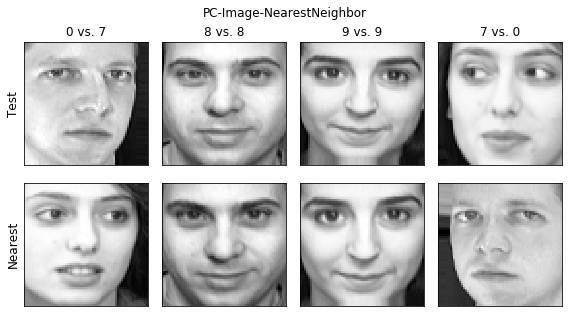

In [18]:
def compute_nearest_neighbors(train_matrix, testImage):
    distances = np.sqrt(np.sum((train_matrix - testImage) ** 2, axis=1))
    idx_of_closest_point_in_train_matrix = np.argsort(distances)
    return idx_of_closest_point_in_train_matrix[0]

test_idx = [1, 87, 94, 78]

faces = fetch_olivetti_faces()
targets = faces.target
faces = faces.images.reshape((len(faces.images), -1))

train_idx = np.array(list(set(list(range(faces.shape[0]))) - set(test_idx)))

train_set = faces[train_idx]
y_train = targets[train_idx]
test_set = faces[np.array(test_idx)]
y_test = targets[np.array(test_idx)]

k = 40
model = PCA(n_components=k)
model.fit(faces);

top_principal_components = model.components_

projected_train_set = train_set.dot(top_principal_components.T)
projected_test_set = test_set.dot(top_principal_components.T)

imgs = list()
est_labels = list()
for i in range(projected_test_set.shape[0]):
    test_image = projected_test_set[i, :]
    nnIdx = compute_nearest_neighbors(projected_train_set, test_image)
    imgs.extend([test_set[i,:], train_set[nnIdx, :]])
    est_labels.append(y_train[nnIdx])

row_titles = ['Test', 'Nearest']
col_titles = ['%d vs. %d' % (i, j) for i, j in zip(y_test, est_labels)]
plot_tools.plot_image_grid(imgs,
                               "PC-Image-NearestNeighbor",
                               (64, 64), len(projected_test_set), 
                           n_row=2, bycol=True, row_titles=row_titles, col_titles=col_titles)


# KMeans

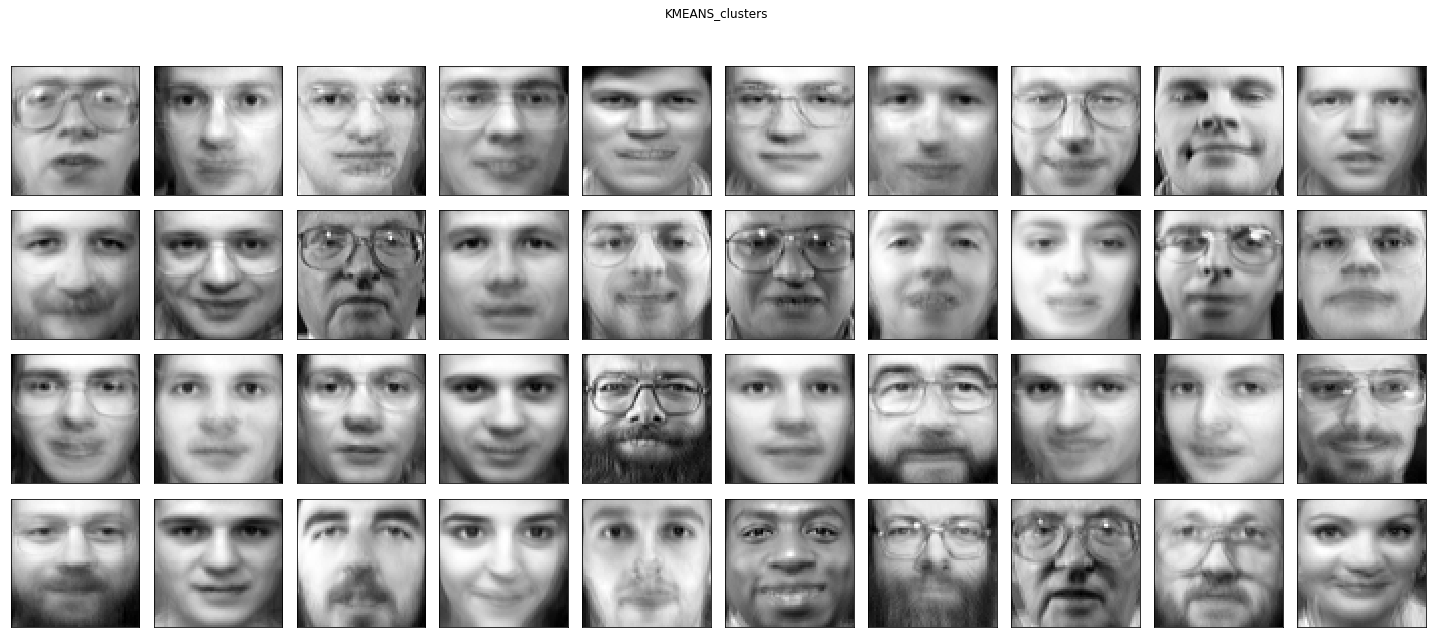

In [19]:
rng = RandomState(0)
center = True
n_components = 40

faces = fetch_olivetti_faces().data
faces_centered = faces - faces.mean(axis=0)
estimator =  KMeans(n_clusters=n_components, random_state=rng)
estimator.fit(faces)
kmeans_components = estimator.cluster_centers_
plot_tools.plot_image_grid(kmeans_components, "KMEANS_clusters", (64, 64), 10, n_row=4, bycol=True)

In [20]:
kmeans_components.shape

(40, 4096)

In [21]:
def plot_gallery(title, images, n_col,n_row, image_shape = (64, 64), cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [22]:
len(kmeans_components)

40

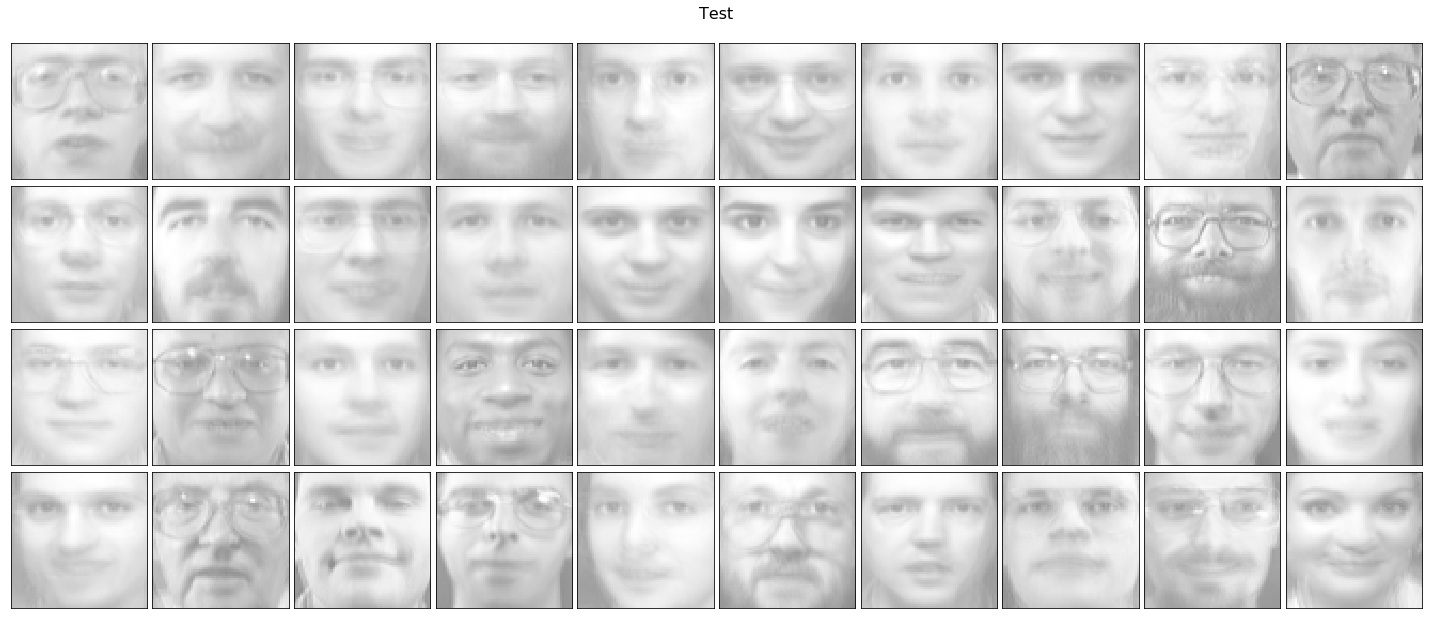

In [23]:
n_row, n_col = 4, 10
plot_gallery('Test', kmeans_components, n_col=n_col, n_row=n_row)

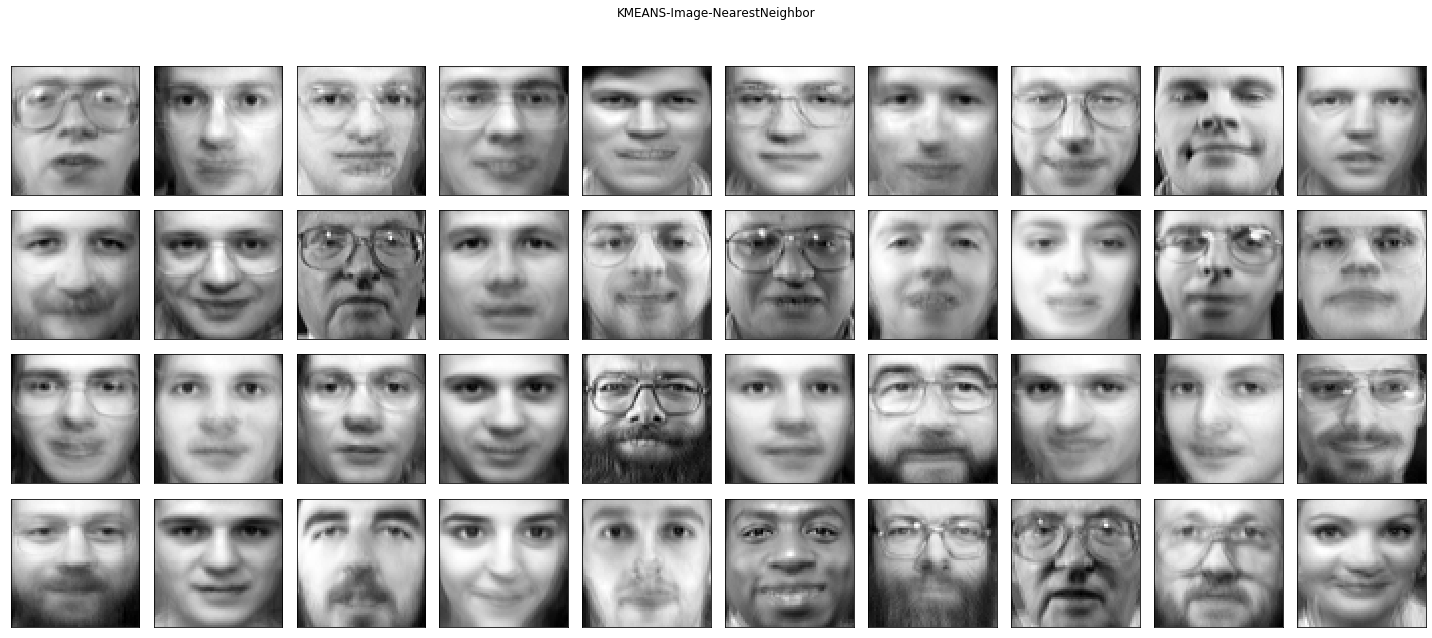

In [24]:
plot_tools.plot_image_grid(kmeans_components, "KMEANS-Image-NearestNeighbor", (64, 64), 10, n_row=4, bycol=True)

# Experimentation

In [25]:
A = np.identity(3)

In [26]:
B = A + np.diag([2,2,2])

In [27]:
w_A, v_A = np.linalg.eigh(A)
w_B, v_B = np.linalg.eigh(B)

In [28]:
print("{} \n {} \n {} \n {}".format(w_A, v_A, w_B, v_B))

[1. 1. 1.] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
 [3. 3. 3.] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [29]:
A = np.diag([1,2,3])
c_A = A  - np.mean(A, axis=0)
cov_A = np.cov(A, rowvar=False)

In [30]:
A = np.array([[1,2,1], [2,3,2], [4,3,3], [5,5,5]])
A

array([[1, 2, 1],
       [2, 3, 2],
       [4, 3, 3],
       [5, 5, 5]])

In [31]:
np.mean(A, axis=0)

array([3.  , 3.25, 2.75])

In [32]:
np.mean(A, axis=1)

array([1.33333333, 2.33333333, 3.33333333, 5.        ])

In [33]:
A - np.mean(A, axis=0)

array([[-2.  , -1.25, -1.75],
       [-1.  , -0.25, -0.75],
       [ 1.  , -0.25,  0.25],
       [ 2.  ,  1.75,  2.25]])

In [34]:
np.array([1,2,1]) - np.array([1.33333333, 1.33333333, 1.33333333])

array([-0.33333333,  0.66666667, -0.33333333])

In [35]:
w_A, v_A = np.linalg.eigh(cov_A)

In [36]:
w_A

array([2.82081068e-17, 1.16666667e+00, 3.50000000e+00])

In [37]:
v_A

array([[ 0.85714286, -0.50507627, -0.10101525],
       [ 0.42857143,  0.80812204, -0.40406102],
       [ 0.28571429,  0.30304576,  0.90913729]])

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(3)
pca.fit(A)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.components_

array([[ 0.65145732,  0.43643691,  0.62058536],
       [ 0.67710535, -0.70344776, -0.21607773],
       [ 0.34224509,  0.56096708, -0.75377996]])

In [41]:
def pca_code(data):
    #raw_implementation
    var_per=.98
    data= data - np.mean(data, axis=0)
    # data/=np.std(data, axis=0)
    cov_mat=np.cov(data, rowvar=False)
    evals, evecs = np.linalg.eigh(cov_mat)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    variance_retained=np.cumsum(evals)/np.sum(evals)
    print(variance_retained)
    index=np.argmax(variance_retained>=var_per)
    evecs = evecs[:,:index+1]
    reduced_data=np.dot(evecs.T, data.T).T
    print("evals", evals)
    print("_"*30)
    print(evecs.T[1, :])
    print("_"*30)
    clf=PCA(var_per)
    X_train=data
    X_train=clf.fit_transform(X_train)
    print(clf.explained_variance_)
    print("_"*30)
    print(clf.components_)
    print("_"*30)
    print("_"*30)
    print(clf.components_[1,:])
    print("_"*30)

In [42]:
pca_code(A)

[0.96140998 0.9994736  1.        ]
evals [7.53104483e+00 2.98165023e-01 4.12348402e-03]
______________________________
[-0.67710535  0.70344776  0.21607773]
______________________________
[7.53104483 0.29816502]
______________________________
[[ 0.65145732  0.43643691  0.62058536]
 [ 0.67710535 -0.70344776 -0.21607773]]
______________________________
______________________________
[ 0.67710535 -0.70344776 -0.21607773]
______________________________
